# PROJECT NAME:
# Fake news detection system

# Introduction:

The spread of fake news has become a pressing issue in the digital age. Misinformation can have far-reaching consequences, including impacting public opinion and decision-making. Fake news is the intentional broadcasting of false or misleading claims as news, where the statements are purposely deceitful. Traditional print media has given way to digital platforms, including blogs, social media, and mobile news apps, enabling instant access to news updates. These platforms foster global connectivity and discussions on various subjects. However, fake news items on digital platforms are getting more popular and are used for profit, such as political and financial gain. In this project, we aim to develop a machine learning-based system to detect fake news articles. The product model will test the unseen data, the results will be plotted, and accordingly, the product will be a model that detects and classifies fake articles and can be used and integrated with any system for future use.

# Problem statement:


Because the Internet, social media, and digital platforms are widely used, anybody may propagate inaccurate and biased information. It is almost impossible to prevent the spread of fake news. There is a tremendous surge in the distribution of false news, which is not restricted to one sector such as politics but includes sports, health, history, entertainment, and science and research.
It is vital to recognize and differentiate between false and accurate news. One method is to have an expert decide, and fact checks every piece of information, but this takes time and needs expertise that cannot be shared. Secondly, we can use machine learning and artificial intelligence tools to automate the identification of fake news.
The primary objective of this project is to build a fake news detection system that can accurately distinguish between credible and non-credible news sources. We aim to address the following challenges:
•	Identification: Develop methods to identify fake news articles.
•	Classification: Categorize news articles as fake or credible.
•	Performance: Improve the system's accuracy and generalization.

# Methodology:

1.	Data Collection:
The dataset used for this project consists of 20,800 news articles, with labels indicating whether they are classified as fake or reliable. The dataset was sourced from kaggle.
2.	Preprocessing
  It is Handling Missing Data
 The dataset initially contained missing values, particularly in the 'title' and 'author' columns. To maintain data integrity, missing values were filled with empty strings.
3. Text Cleaning
Text data underwent preprocessing steps, including removing special characters, converting text to lowercase, and eliminating stopwords to enhance the quality of the data for analysis.

4.	Text to Numerical Conversion
The textual data was transformed into numerical format using the TF-IDF vectorization technique. This process involved converting the text into a matrix of TF-IDF features, capturing the importance of each word in the dataset
5.	Model Selection
  Chosen Models
Five machine learning models were selected for evaluation:

  •	Logistic Regression

  •	Decision Tree

  •	Naive Bayes

  •	Random Forest

  •	Gradient Boosting

  We have also used some deep learning models

  •	Sequence model
6.	Model Training and Evaluation
•	Logistic Regression
      The logistic regression model achieved an accuracy of 98%, demonstrating its effectiveness in classifying news articles.
•	Decision Tree
      The decision tree model performed exceptionally well with a 99% accuracy score, showcasing its ability to accurately classify news articles.
•	Naive Bayes
The Naive Bayes model achieved an accuracy of 80%, indicating its proficiency in distinguishing between fake and reliable news.
•	Random Forest
   The Random Forest model demonstrated a high accuracy of 99%, making it a robust choice for fake news detection.
•	Gradient Boosting
The Gradient Boosting model exhibited a strong performance with a 97% accuracy score.


In [ ]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# load the dataset
news_d = pd.read_csv("/content/drive/My Drive/datascience/data/train.csv")

In [ ]:
print("Shape of News data:", news_d.shape)
print("News data columns", news_d.columns)

Shape of News data: (20800, 5)
News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [ ]:
# by using df.head(), we can immediately familiarize ourselves with the dataset.
news_d.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#Text Word startistics: min.mean, max and interquartile range

txt_length = news_d.text.str.split().str.len()
txt_length.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

In [ ]:
#Title statistics

 title_length = news_d.title.str.split().str.len()
title_length.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

1: Unreliable
0: Reliable
Distribution of labels:
1    10413
0    10387
Name: label, dtype: int64


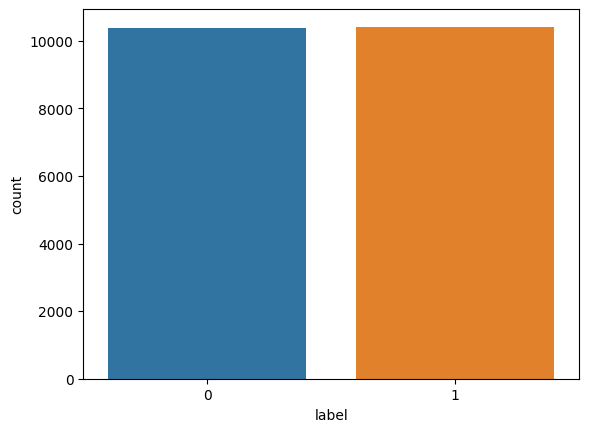

In [ ]:
sns.countplot(x="label", data=news_d);
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(news_d.label.value_counts());

In [ ]:
print(round(news_d.label.value_counts(normalize=True),2)*100);

1    50.0
0    50.0
Name: label, dtype: float64


In [ ]:
#Preprocessing
news_d.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
news_d.shape

(20800, 5)

In [ ]:
news_d = news_d.fillna(' ')

In [ ]:
news_d.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
news_d['content'] = news_d['author']+' '+news_d['title']

In [ ]:
news_d

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
...,...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,"Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma..."
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0,Michael J. de la Merced and Rachel Abrams Macy...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,"Alex Ansary NATO, Russia To Hold Parallel Exer..."


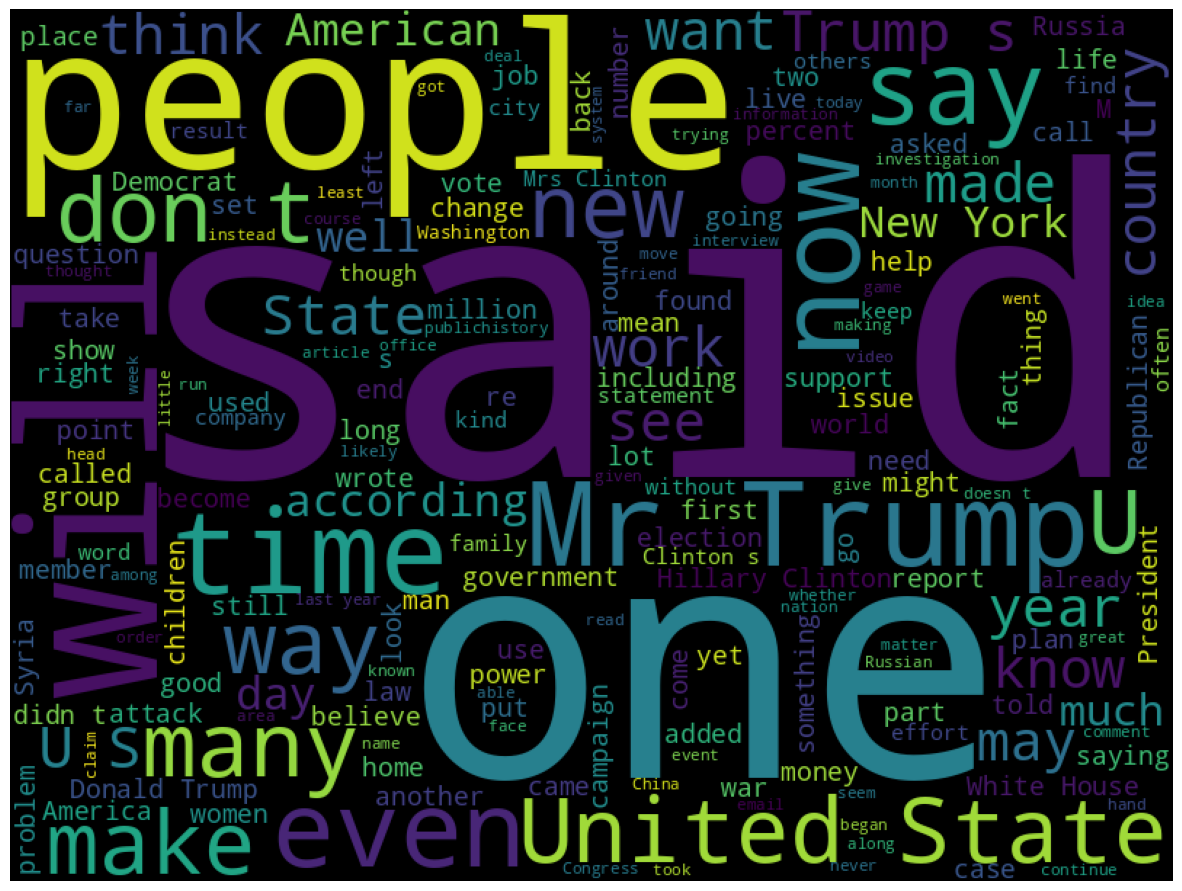

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)
# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(news_d['text']))
# plotting the word cloud
plt.figure(figsize=(15,15))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

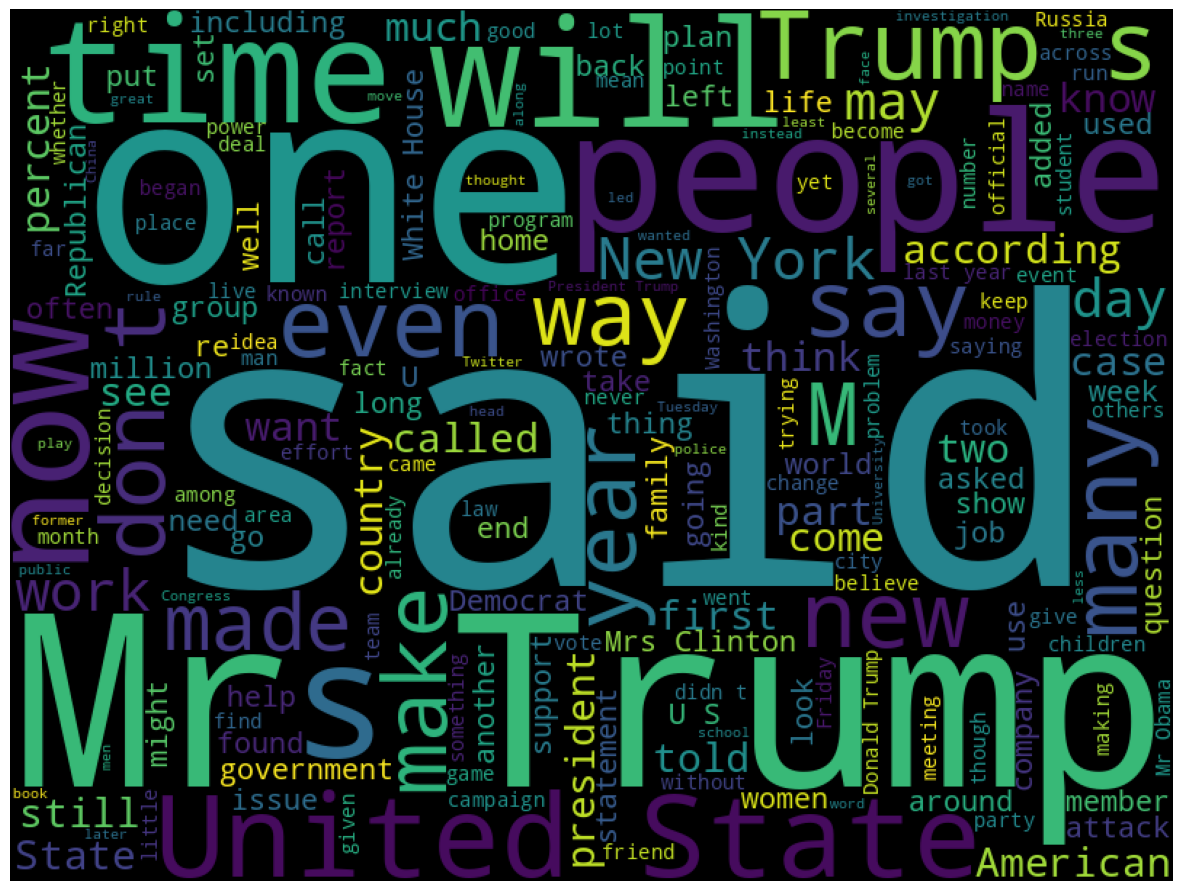

In [ ]:
#for true news
true_n = ' '.join(news_d[news_d['label']==0]['text'])
wc = wordcloud.generate(true_n)
plt.figure(figsize=(15,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

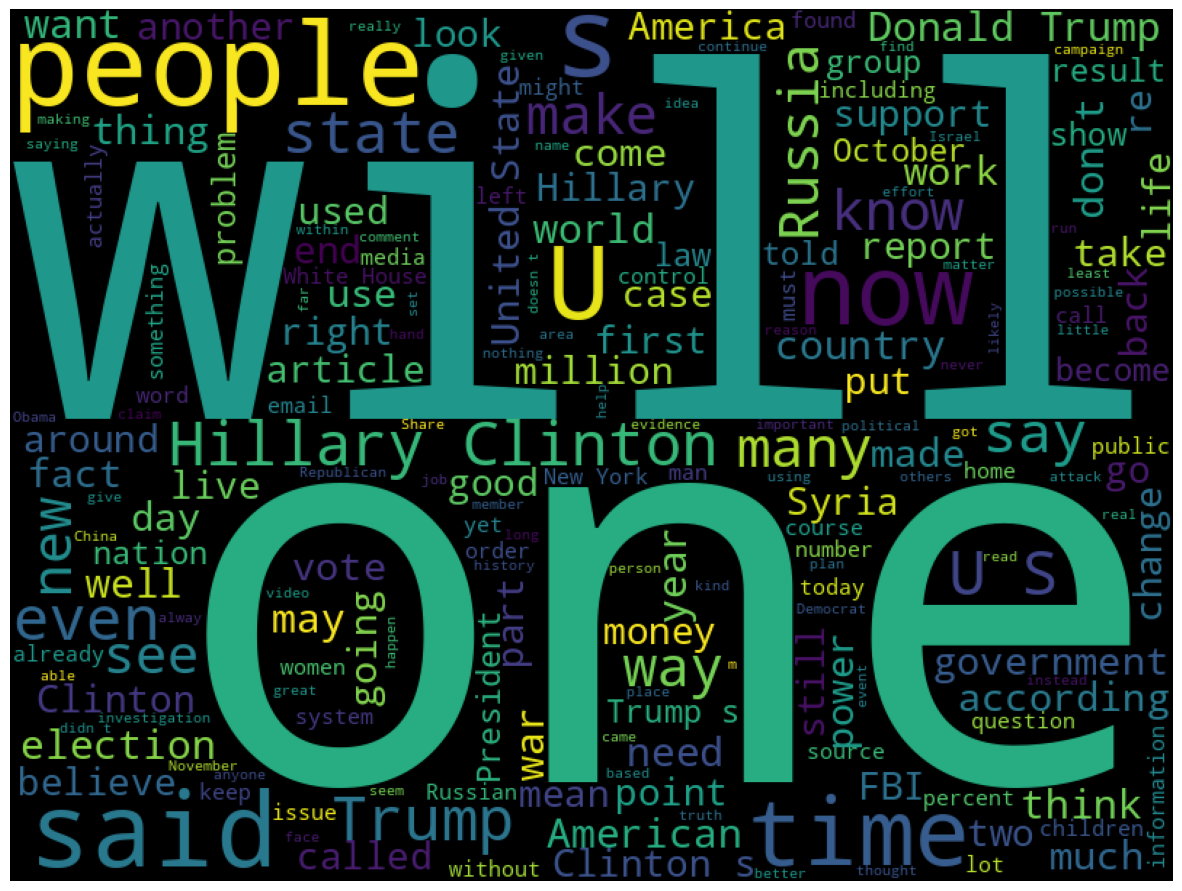

In [ ]:
#for fake news
fake_n = ' '.join(news_d[news_d['label']==1]['text'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(15,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
X = news_d.drop('label',axis=1)
y = news_d['label']

In [ ]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [ ]:
#Stemming: Stemming is the process of reducing a word to its Root word example: hung hanged hanging ======hang
ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [ ]:
news_d['content'] = news_d['content'].apply(stemming)

In [ ]:
news_d['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [ ]:
#separating the data and label
X = news_d['content'].values
y = news_d['label'].values

In [ ]:
#converting the textual data to numerical data
vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [ ]:
#Splitting the dataset to training & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [ ]:
X_train.shape

(16640, 17128)

In [ ]:
# Initialize a dictionary to store accuracy scores
accuracy_scores = {}

In [ ]:
# Initialize dictionaries to store confusion matrices and classification reports
conf_matrices = {}
class_reports = {}

In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_scores["Logistic Regression"] = accuracy_score(y_test, lr_model.predict(X_test))
conf_matrices["Logistic Regression"] = confusion_matrix(y_test, lr_model.predict(X_test))
class_reports["Logistic Regression"] = classification_report(y_test, lr_model.predict(X_test))

In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
accuracy_scores["Decision Tree"] = accuracy_score(y_test, dt_model.predict(X_test))
conf_matrices["Decision Tree"] = confusion_matrix(y_test, dt_model.predict(X_test))
class_reports["Decision Tree"] = classification_report(y_test, dt_model.predict(X_test))

In [ ]:
# Naive Bayes
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()
nb_model = GaussianNB()
nb_model.fit(X_train_dense, y_train)
accuracy_scores["Naive Bayes"] = accuracy_score(y_test, nb_model.predict(X_test_dense))
conf_matrices["Naive Bayes"] = confusion_matrix(y_test, nb_model.predict(X_test_dense))
class_reports["Naive Bayes"] = classification_report(y_test, nb_model.predict(X_test_dense))

In [ ]:
# Random Forest
RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train, y_train)
accuracy_scores["Random Forest"] = accuracy_score(y_test, RFC.predict(X_test))
conf_matrices["Random Forest"] = confusion_matrix(y_test, RFC.predict(X_test))
class_reports["Random Forest"] = classification_report(y_test, RFC.predict(X_test))

In [ ]:
# Gradient Boosting
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(X_train, y_train)
accuracy_scores["Gradient Boosting"] = accuracy_score(y_test, GBC.predict(X_test))
conf_matrices["Gradient Boosting"] = confusion_matrix(y_test, GBC.predict(X_test))
class_reports["Gradient Boosting"] = classification_report(y_test, GBC.predict(X_test))

In [ ]:
# Print accuracy scores
print("\nAccuracy Scores:")
for model, accuracy in accuracy_scores.items():
    print(f"{model}: {accuracy:.4f}")


Accuracy Scores:
Logistic Regression: 0.9791
Decision Tree: 0.9928
Naive Bayes: 0.8038
Random Forest: 0.9942
Gradient Boosting: 0.9675


In [ ]:
# Print confusion matrices
print("\nConfusion Matrices:")
for model, conf_matrix in conf_matrices.items():
    print(f"{model}:\n{conf_matrix}")


Confusion Matrices:
Logistic Regression:
[[2004   73]
 [  14 2069]]
Decision Tree:
[[2065   12]
 [  18 2065]]
Naive Bayes:
[[1923  154]
 [ 662 1421]]
Random Forest:
[[2062   15]
 [   9 2074]]
Gradient Boosting:
[[1952  125]
 [  10 2073]]



Confusion Matrices:


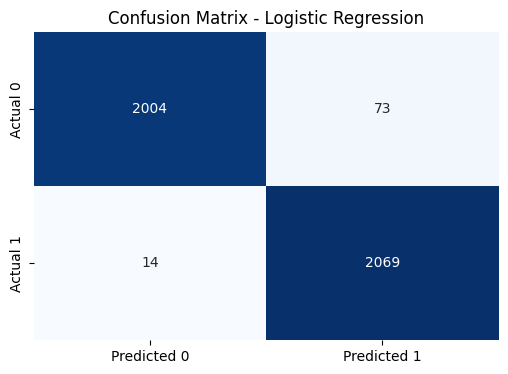

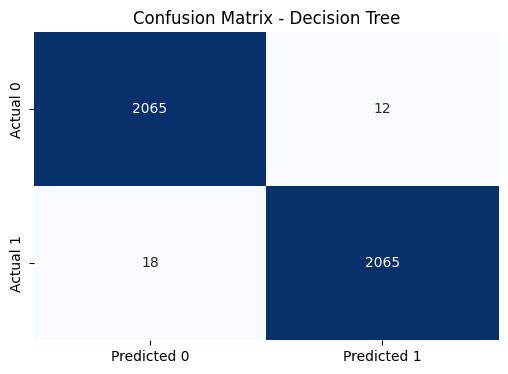

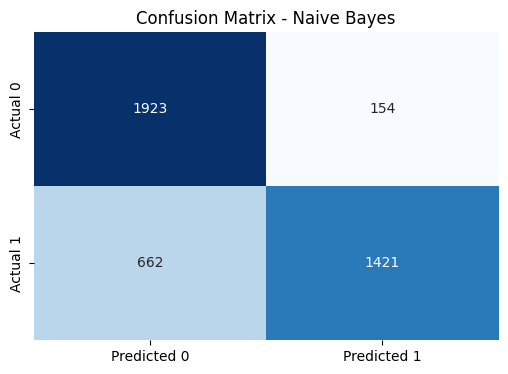

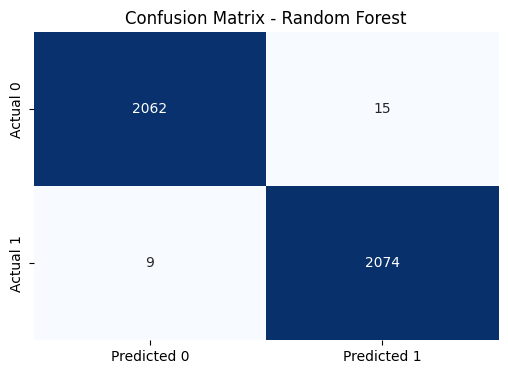

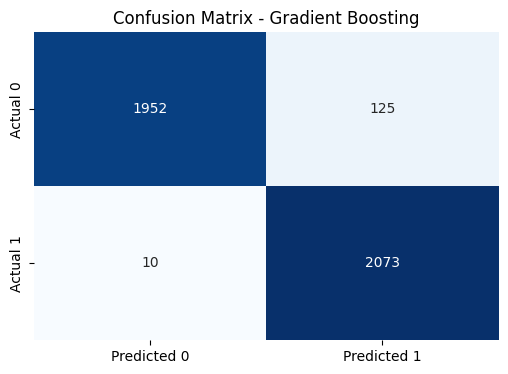

In [ ]:
# Print confusion matrices
print("\nConfusion Matrices:")
for model, conf_matrix in conf_matrices.items():
    # Visualize the confusion matrix using a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix - {model}')
    plt.show()

In [ ]:
# Print classification reports
print("\nClassification Reports:")
for model, class_report in class_reports.items():
    print(f"{model}:\n{class_report}")


Classification Reports:
Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2077
           1       0.97      0.99      0.98      2083

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160

Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160

Naive Bayes:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      2077
           1       0.90      0.68      0.78      2083

    accuracy                           0.80      4160
   macro avg       0.82      0.80      0.80      4160


In [ ]:
best_model_original = max(accuracy_scores, key=accuracy_scores.get)
print(f"\nThe best-performing algorithm for the original data is: {best_model_original} with an accuracy of {accuracy_scores[best_model_original]:.4f}")


The best-performing algorithm for the original data is: Random Forest with an accuracy of 0.9942


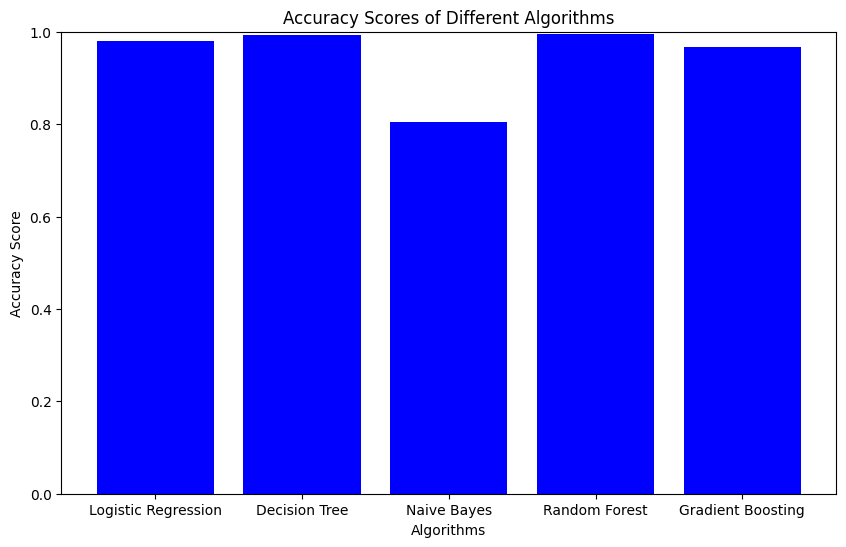

In [ ]:
# Create a bar graph to compare accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='blue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Algorithms')
plt.ylim(0, 1.0)
plt.show()

In [ ]:
def output_lable(n):
    if n == 0:
        return "Not AFake News"
    elif n == 1:
        return "Fake News"

def wordopt(text):

    processed_text = text.lower()
    processed_text = processed_text.translate(str.maketrans("", "", string.punctuation))
    return processed_text

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vector.transform(new_x_test)
    pred_LR = lr_model.predict(new_xv_test)
    pred_DT = dt_model.predict(new_xv_test)
    new_xv_dense = new_xv_test.toarray()
    pred_NB = nb_model.predict(new_xv_dense)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nNB Prediction: {}  \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),
                                                                                                              output_lable(pred_DT[0]),
                                                                                                              output_lable(pred_NB[0]),
                                                                                                              output_lable(pred_GBC[0]),
                                                                                                             output_lable(pred_RFC[0])))

news = str(input("Enter a news article: "))
manual_testing(news)

Enter a news article: The Geometry of Energy and Meditation of Buddha


LR Prediction: Fake News 
DT Prediction: Fake News 
NB Prediction: Fake News  
GBC Prediction: Fake News 
RFC Prediction: Fake News


# APPLYING DEEP LEARNING

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
# load the dataset
df = pd.read_csv("/content/drive/My Drive/datascience/data/train.csv")

In [ ]:
# Assuming 'text' is the column containing the text of the news articles and 'label' is the column containing the labels
texts = df['text'].astype(str).values
labels = df['label'].values

In [ ]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [ ]:
# Pad sequences to a fixed length
max_sequence_length = 1000  # adjust as needed
data = pad_sequences(sequences, maxlen=max_sequence_length)

In [ ]:
# Convert labels to categorical format
labels = to_categorical(labels)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Build the model
embedding_dim = 100  # adjust as needed
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(100))  # adjust as needed
model.add(Dense(2, activation='softmax'))  # assuming two classes, adjust as needed

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
416/416 [==============================] - 680s 2s/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.3674 - val_accuracy: 0.9240
Epoch 2/5
416/416 [==============================] - 639s 2s/step - loss: 0.0350 - accuracy: 0.9893 - val_loss: 0.3585 - val_accuracy: 0.9264
Epoch 3/5
416/416 [==============================] - 637s 2s/step - loss: 0.0170 - accuracy: 0.9946 - val_loss: 0.3569 - val_accuracy: 0.9318
Epoch 4/5
416/416 [==============================] - 635s 2s/step - loss: 0.0080 - accuracy: 0.9979 - val_loss: 0.3584 - val_accuracy: 0.9276
Epoch 5/5
416/416 [==============================] - 638s 2s/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 0.4176 - val_accuracy: 0.9228


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

130/130 [==============================] - 34s 261ms/step - loss: 0.4302 - accuracy: 0.9207
Test Loss: 0.4302, Test Accuracy: 0.9207


# Major Outcomes

•	Model Accuracy
The Random Forest model achieved the highest accuracy among the evaluated models, making it the recommended choice for fake news detection.

•	Insights from Dataset
Descriptive statistics and word cloud visualizations provided valuable insights into the structure and content of the dataset, contributing to a better understanding of the characteristics of fake and reliable news


# Conclusion:

In conclusion, we can say that by using machine learning technique and careful data curation (the process of collecting, organizing, and managing data to ensure its quality, accuracy, and usability), we will develop a system that can identify fake news articles with high accuracy, we learned how to train a machine learning models to classify news articles as real or fake The dataset we used for this project was the Fake and real news dataset from Kaggle . We preprocessed the text by removing stop words, punctuation, and numbers and then used a bag-of-words approach to represent each article as a vector of word frequencies. We trained a number of classifiers on this data and we have seen that The Random Forest model demonstrated superior accuracy in classifying fake and reliable news articles.Future research can explore the integration of deep learning techniques for enhanced fake news detection.
Overall, this project demonstrates how machine learning can be used to tackle the problem of fake news, which is becoming an increasingly important issue in today’s society.
